In [234]:
# from linearity import linearity_test
from bias import create_median_bias
from flats import create_median_flat, create_skyflat
# from darks import create_median_dark, plot_dark_current
from science import reduce_science_frame
from ptc import calculate_gain, calculate_readout_noise
import os
from Figures import before_after, plot_image
from photutils.detection import DAOStarFinder
from astropy.stats import sigma_clipped_stats
from astropy.io import fits, ascii
from photometry import do_aperture_photometry, plot_radial_profile
import numpy as np
from astropy.table import Table
# from Extinction import plot_b_extinction, plot_v_extinction
import matplotlib.pyplot as plt
from standardize import standardize_star, do_standardization
from astropy.visualization import ImageNormalize, ZScaleInterval, LinearStretch
from timeseries import plot_timeseries
from astropy.timeseries import TimeSeries, LombScargle, BoxLeastSquares
from astropy import units as u
from sorter import sort_images
from scipy.optimize import curve_fit

In [12]:
bias_0725 = create_median_bias('20250725/Biases', '0725_median_bias.fits')
bias_0726 = create_median_bias('20250726/Biases', '0726_median_bias.fits')
bias_0727 = create_median_bias('20250727/Biases', '0727_median_bias.fits')
bias_0728 = create_median_bias('20250728/Biases', '0728_median_bias.fits')

In [86]:
b_flat_0725 = create_median_flat('20250725/Flats/B Flats', '0725_median_bias.fits', '0725_skyflat_B.fits', None)
v_flat_0725 = create_median_flat('20250725/Flats/V Flats', '0725_median_bias.fits', '0725_skyflat_V.fits', None)
b_flat_0726 = create_median_flat('20250726/Flats/B Flats', '0726_median_bias.fits', '0726_skyflat_B.fits', None)
v_flat_0726 = create_median_flat('20250726/Flats/V Flats', '0726_median_bias.fits', '0726_skyflat_V.fits', None)

In [8]:
b_flat_dome = create_median_flat('20250728/Flats/B Dome', '0728_median_bias.fits', 'dome_flat_B.fits', None)
v_flat_dome = create_median_flat('20250728/Flats/V Dome', '0728_median_bias.fits', 'dome_flat_V.fits', None)

In [9]:
# Creates illumination flats
ilum_b = create_skyflat('20250725/Flats/B Flats', '0725_median_bias.fits', '0725_illumination_flat_B.fits', 'dome_flat_B.fits', None)
ilum_v = create_skyflat('20250725/Flats/V Flats', '0725_median_bias.fits', '0725_illumination_flat_V.fits', 'dome_flat_V.fits', None)
# create_skyflat('20250704/Flats/B Flats', '0705_median_bias.fits', '0704_skyflat_B.fits', 'domeflat_B.fits', None)
# create_skyflat('20250704/Flats/V Flats', '0705_median_bias.fits', '0704_skyflat_V.fits', 'domeflat_V.fits', None)

In [ ]:
# Reduced the V452 Vul Images from 07/05
reduce_science_frame('20250725/V452 Vul', 
                     '0725_median_bias.fits', 
                     '0725_skyflat', 
                     '0725 V452 Vul', 
                     'Reduced Images/V452 Vul')


array([[101.40402 ,  74.84435 ,  97.12813 , ...,  98.5369  , 105.755905,
         99.637054],
       [ 75.82746 ,  73.84168 ,  62.998028, ...,  77.97731 ,  67.50027 ,
         54.513447],
       [ 62.598255,  53.788696,  63.04292 , ...,  65.98136 ,  68.69468 ,
         56.283222],
       ...,
       [ 84.4883  ,  95.59878 , 103.21312 , ...,  84.62881 ,  88.31815 ,
         84.058266],
       [102.271194, 104.34561 ,  84.8128  , ..., 104.44168 ,  79.982765,
        104.12086 ],
       [ 84.57723 ,  84.85931 , 120.58209 , ..., 106.78822 , 122.30066 ,
         88.85008 ]], dtype=float32)

In [13]:
# Reduces Starfield Images from 07/26
reduce_science_frame('20250726/Starfield', 
                     '0726_median_bias.fits', 
                     'dome_flat', 
                     '0726_Standard_Stars', 
                     'Reduced Images/Starfield')

array([[269.08975, 263.49164, 315.63992, ..., 310.7937 , 235.13887,
        218.31538],
       [272.44284, 252.50293, 247.97163, ..., 259.93393, 276.91324,
        262.7406 ],
       [237.97923, 251.66779, 289.27527, ..., 276.0963 , 273.56042,
        252.20795],
       ...,
       [336.70316, 293.1108 , 311.64066, ..., 319.78815, 345.71777,
        334.83536],
       [269.5542 , 319.24   , 320.1349 , ..., 334.06583, 321.12457,
        376.2739 ],
       [298.3675 , 355.5466 , 327.21454, ..., 343.1558 , 301.53397,
        326.23883]], dtype=float32)

In [87]:
# Reduces Starfield Images from 07/26 with twilight flats
reduce_science_frame('20250726/Starfield', 
                     '0726_median_bias.fits', 
                     '0726_skyflat', 
                     '0726_Standard_Stars_skyflat', 
                     'Reduced Images/Starfield')

array([[273.28983, 270.99625, 322.41492, ..., 317.42224, 242.74352,
        225.85771],
       [269.0278 , 252.44464, 245.89467, ..., 260.9497 , 278.13885,
        264.35068],
       [236.41936, 248.9504 , 289.02374, ..., 280.53323, 274.38992,
        253.26344],
       ...,
       [341.87756, 293.8661 , 315.3487 , ..., 316.46597, 343.66724,
        336.08325],
       [272.90594, 317.6019 , 319.20105, ..., 332.71805, 315.23865,
        377.0135 ],
       [298.57706, 358.50504, 329.5974 , ..., 342.27966, 299.54492,
        325.50287]], dtype=float32)

In [ ]:
# Reduces Starfield Images from 07/06
reduce_science_frame('20250706/Starfield', 
                     '0706_median_bias.fits', 
                     'domeflat', 
                     '0706_Standard_Stars', 
                     'Reduced Images', 
                     '0706_skyflat')

array([[1303.1223, 1255.017 , 1319.1606, ..., 1302.0503, 1244.2207,
        1356.6193],
       [1221.8984, 1221.5931, 1220.2543, ..., 1240.8265, 1254.616 ,
        1219.2522],
       [1222.1016, 1204.2445, 1230.8181, ..., 1180.9592, 1218.0128,
        1202.7777],
       ...,
       [1394.1703, 1356.7991, 1392.4535, ..., 1406.8013, 1390.6292,
        1410.8845],
       [1315.9916, 1352.3323, 1441.2281, ..., 1326.6521, 1401.41  ,
        1438.688 ],
       [1374.2322, 1405.7006, 1437.7745, ..., 1393.9194, 1455.1958,
        1343.051 ]], dtype=float32)

In [2]:
# Calculate the Gain and Readout Noise
gain = calculate_gain('20250725/Flats/V Flats')
readout_noise = calculate_readout_noise('20250725/Biases', gain)
print(gain)
print(readout_noise)

1.542548660077179
15.40711529284689


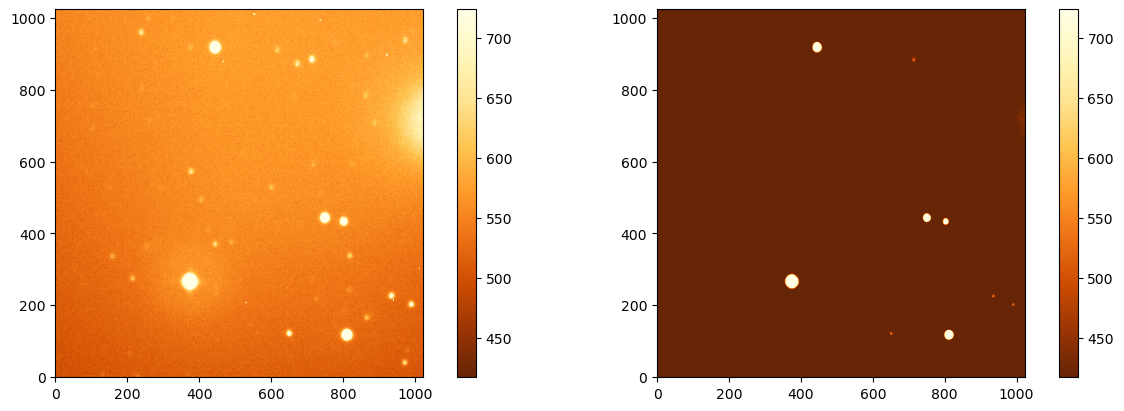

In [3]:
before_after('20250726/Starfield/ecam-0042.fits','Reduced Images/Starfield/0726_Standard_Stars_V_1.fits', 'Starfield Reduction.png' )

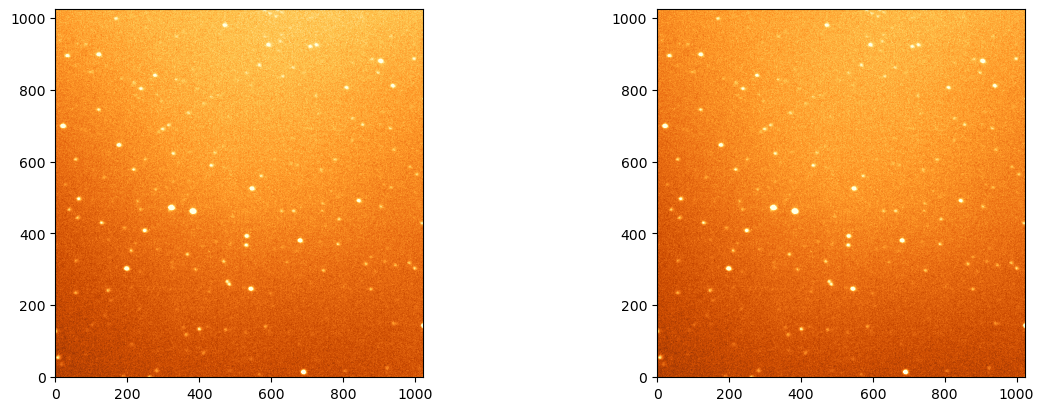

In [5]:
before_after('Reduced Images/0706_Standard_Stars_B_1.fits','Reduced Images/0706_Standard_Stars_noskyflat_B_1.fits', 'Skyflat Comparison.png' )

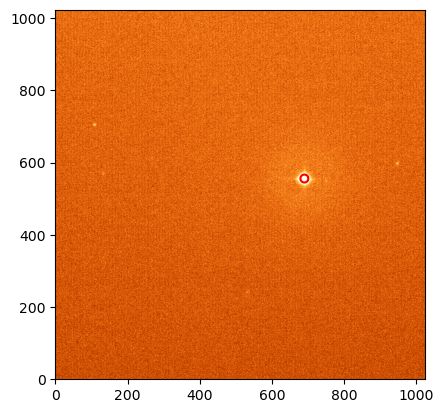

In [2]:
plot_image('Reduced Images/0705 26 Draconis_V_1.fits', '26 Draconis V.png')

In [4]:
image = 'Reduced Images/Starfield/0726_Standard_Stars_V_1.fits'
reduced_image = fits.getdata(image)
header = fits.getheader(image)
t_exp = header['EXPTIME']

In [5]:
image1 = 'Reduced Images/Starfield/0726_Standard_Stars_B_1.fits'
reduced_image1 = fits.getdata(image1)
header1 = fits.getheader(image1)
t_exp1 = header1['EXPTIME']

In [7]:
# radii = list(range(1,30))
radii = [13]

In [32]:
b_extinction = []
b_airmass = []
v_extinction = []
v_airmass = []

In [10]:
 
positions = []
mean, median, std = sigma_clipped_stats(reduced_image)
        

dao1 = DAOStarFinder(fwhm = 5, threshold = 3.5*std, min_separation = 20)
# dao2 = DAOStarFinder(fwhm = 3, threshold = 1.04*std)


dets = dao1(reduced_image)
# dets1 = dets[((dets['xcentroid'] > 410) & (dets['xcentroid'] < 430) & (dets['ycentroid'] > 540) & (dets['ycentroid'] < 550))]

dets.sort(['mag'])
print(dets)
x_pos = dets['xcentroid'].tolist()
y_pos = dets['ycentroid'].tolist()

position1 = list(zip(x_pos, y_pos))
for i in range(0, 3):
    positions.append(position1[i])
# dets2 = dao1(reduced_image)
# dets2 = dets2[((dets['xcentroid'] > 410) & (dets['xcentroid'] < 430) & (dets['ycentroid'] > 540) & (dets['ycentroid'] < 550))]
        
# x_pos2 = dets2['xcentroid'].tolist()
# y_pos2 = dets2['ycentroid'].tolist()


# position2 = list(zip(x_pos2, y_pos2))
# positions.append(position2[0])
positions

 id     xcentroid          ycentroid      ...    flux      mag     daofind_mag
--- ------------------ ------------------ ... --------- ---------- -----------
  7 374.75183995507354 263.50789768537857 ... 1393536.1 -15.360296  -5.5157905
  3  811.8596194069315 115.04054421181625 ... 261278.05 -13.542757  -3.6843095
 11  444.9278819266194  914.0853710084345 ... 184226.56 -13.163381  -3.2505417
  9  750.1790411579119 440.38835523298474 ... 105392.07  -12.55702  -2.6246812
  8  802.8042797886426  430.1895888314223 ...  50877.85 -11.766321  -1.5001683
  6  935.4927526900035 224.80394608023303 ... 24691.928 -10.981387 -0.19540083
  4  651.0010322502864 120.05377734818533 ... 24437.684  -10.97015 -0.26165867
 10  714.1230325250706  881.2874743988303 ... 24071.756  -10.95377 -0.27506495
  5  990.3670749598102 200.76360694161227 ...  24067.61 -10.953583 -0.45031637
 12 2.6644726847846947 1020.9271022959497 ...   9375.51  -9.929987  -1.4325858
 13 1020.9262224444587 1020.8070226344748 ...  8308.

[(374.75183995507354, 263.50789768537857),
 (811.8596194069315, 115.04054421181625),
 (444.9278819266194, 914.0853710084345)]

In [ ]:
positions1 = []
mean, median, std = sigma_clipped_stats(reduced_image1)
        

dao2 = DAOStarFinder(fwhm = 5, threshold = 3.5*std, min_separation = 20)
# dao2 = DAOStarFinder(fwhm = 3, threshold = 1.04*std)


dets1 = dao2(reduced_image1)
# dets1 = dets[((dets['xcentroid'] > 410) & (dets['xcentroid'] < 430) & (dets['ycentroid'] > 540) & (dets['ycentroid'] < 550))]

dets1.sort(['mag'])

x_pos = dets1['xcentroid'].tolist()
y_pos = dets1['ycentroid'].tolist()

position = list(zip(x_pos, y_pos))
for i in range(0, 3):
    positions1.append(position[i])
# dets2 = dao1(reduced_image)
# dets2 = dets2[((dets['xcentroid'] > 410) & (dets['xcentroid'] < 430) & (dets['ycentroid'] > 540) & (dets['ycentroid'] < 550))]
        
# x_pos2 = dets2['xcentroid'].tolist()
# y_pos2 = dets2['ycentroid'].tolist()


# position2 = list(zip(x_pos2, y_pos2))
# positions.append(position2[0])
positions1

 id     xcentroid          ycentroid      ...    flux       mag     daofind_mag
--- ------------------ ------------------ ... --------- ----------- -----------
  4   376.560649839612  263.9232547796359 ... 507909.62  -14.264465  -3.8131733
  7 446.73870393776656  914.1145027255795 ... 140838.42  -12.871803   -2.203735
  3  813.6356157047343 115.30548274330735 ... 129998.52  -12.784845  -2.2727954
  6  751.9093938839274  441.0579082363328 ...  80982.89  -12.270984  -1.4729533
  5  804.3080949332193  430.7175994370034 ... 35280.832  -11.368847 -0.19146687
  9 1020.8806591365983 1020.9552779904736 ... 11706.477  -10.171065  -1.7268922
  8 2.1728705397304684 1020.8558164084844 ... 11068.575 -10.1102295   -1.594987
  2 1020.8548435353799 2.0821373489736157 ...  9553.629    -9.95042  -1.5033123
  1 2.0868075715232983 2.0770623678035824 ...  9543.846   -9.949308  -1.4873278


[(376.560649839612, 263.9232547796359),
 (446.73870393776656, 914.1145027255795),
 (813.6356157047343, 115.30548274330735)]

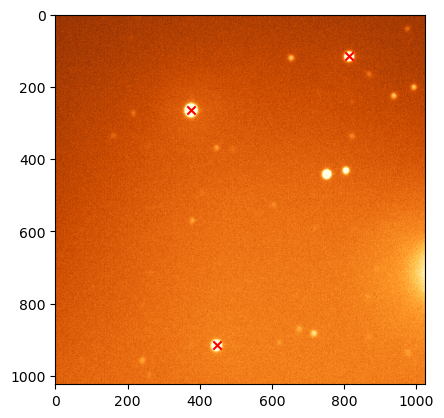

In [15]:
norm = ImageNormalize(reduced_image1, interval=ZScaleInterval(), stretch=LinearStretch())

plt.imshow(reduced_image1, origin='lower', norm=norm, cmap='YlOrBr_r')
plt.scatter(dets1['xcentroid'][0:3], dets1['ycentroid'][0:3], marker = 'x', color = 'r')
plt.gca().invert_yaxis() 


In [23]:
ap_phot, areas = do_aperture_photometry(image, positions, radii, 80, 5);

print(ap_phot)

[<CircularAperture([[374.75183996, 263.50789769],
                 [811.85961941, 115.04054421],
                 [444.92788193, 914.08537101]], r=13.0)>]
 id      xcenter            ycenter         aperture_sum_0      background    
--- ------------------ ------------------ ----------------- ------------------
  1 374.75183995507354 263.50789768537857 5314974.297759819 308.28765869140625
  2  811.8596194069315 115.04054421181625 952955.8691048949 276.50030517578125
  3  444.9278819266194  914.0853710084345 705844.1673925763  329.2869567871094


In [17]:
ap_phot1, areas1 = do_aperture_photometry(image1, positions1, radii, 80, 5);

ap_phot1

[<CircularAperture([[376.56064984, 263.92325478],
                 [446.73870394, 914.11450273],
                 [813.6356157 , 115.30548274]], r=13.0)>]


id,xcenter,ycenter,aperture_sum_0,background
int32,float64,float64,float64,float64
1,376.560649839612,263.9232547796359,2094150.2376029645,425.9996337890625
2,446.73870393776656,914.1145027255795,556433.3922159112,464.18763732910156
3,813.6356157047343,115.30548274330735,470155.5083936624,401.62493896484375


In [237]:
target_images = sorted(os.listdir('Reduced Images/V452 Vul'))
target_images


['0725 V452 Vul_V_1.fits',
 '0725 V452 Vul_V_10.fits',
 '0725 V452 Vul_V_11.fits',
 '0725 V452 Vul_V_12.fits',
 '0725 V452 Vul_V_13.fits',
 '0725 V452 Vul_V_14.fits',
 '0725 V452 Vul_V_15.fits',
 '0725 V452 Vul_V_16.fits',
 '0725 V452 Vul_V_17.fits',
 '0725 V452 Vul_V_18.fits',
 '0725 V452 Vul_V_19.fits',
 '0725 V452 Vul_V_2.fits',
 '0725 V452 Vul_V_20.fits',
 '0725 V452 Vul_V_21.fits',
 '0725 V452 Vul_V_22.fits',
 '0725 V452 Vul_V_24.fits',
 '0725 V452 Vul_V_25.fits',
 '0725 V452 Vul_V_26.fits',
 '0725 V452 Vul_V_27.fits',
 '0725 V452 Vul_V_28.fits',
 '0725 V452 Vul_V_29.fits',
 '0725 V452 Vul_V_3.fits',
 '0725 V452 Vul_V_30.fits',
 '0725 V452 Vul_V_31.fits',
 '0725 V452 Vul_V_32.fits',
 '0725 V452 Vul_V_33.fits',
 '0725 V452 Vul_V_34.fits',
 '0725 V452 Vul_V_35.fits',
 '0725 V452 Vul_V_36.fits',
 '0725 V452 Vul_V_37.fits',
 '0725 V452 Vul_V_38.fits',
 '0725 V452 Vul_V_39.fits',
 '0725 V452 Vul_V_4.fits',
 '0725 V452 Vul_V_40.fits',
 '0725 V452 Vul_V_5.fits',
 '0725 V452 Vul_V_6.fits'

In [238]:
times = []
mags_target = []
mags_comp = []
for i in range(0, len(target_images)):
        header = fits.getheader(f'Reduced Images/V452 Vul/{target_images[i]}')
        data = fits.getdata(f'Reduced Images/V452 Vul/{target_images[i]}')
        t_exp = header['EXPTIME']

        radii = [13]

        positions2 = []
    
        mean, median, std = sigma_clipped_stats(data)
        

        dao2 = DAOStarFinder(fwhm = 5, threshold = 3.5*std, min_separation = 20)

        dets = dao2(data)
        dets.sort(['mag'])
        
        x_pos = dets['xcentroid'].tolist()
        y_pos = dets['ycentroid'].tolist()

        position = list(zip(x_pos, y_pos))
        for i in range(0, 2):
            positions2.append(position[i])
        
        print(positions2)
        
    
    
    # Performs aperture photometry on reduced_science1.fits
        ap_phot, areas = do_aperture_photometry(f'Reduced Images/V452 Vul/{target_images[i]}', positions2, radii, 80, 5)
        
        
        
        times.append(header['DATE-OBS']) 
        mags_target.append(-2.5*np.log10(ap_phot['aperture_sum_0'][0]/t_exp)) 
        mags_comp.append(-2.5*np.log10(ap_phot['aperture_sum_0'][1]/t_exp)) 

      
        

[(548.7883001004268, 491.5800399852303), (99.93184340081991, 683.462867147112)]
[<CircularAperture([[548.7883001 , 491.58003999],
                 [ 99.9318434 , 683.46286715]], r=13.0)>]
[(548.7288058190146, 494.5270951422074), (99.5909938267045, 686.5564660442562)]
[<CircularAperture([[548.72880582, 494.52709514],
                 [ 99.59099383, 686.55646604]], r=13.0)>]
[(545.2064287303975, 494.178434300321), (96.07983295625506, 686.0112513462071)]
[<CircularAperture([[545.20642873, 494.1784343 ],
                 [ 96.07983296, 686.01125135]], r=13.0)>]
[(547.0880016921785, 492.97414526387644), (97.89050468115485, 685.0638396322959)]
[<CircularAperture([[547.08800169, 492.97414526],
                 [ 97.89050468, 685.06383963]], r=13.0)>]
[(545.4668501722878, 492.94049813138406), (96.43400685399358, 684.8376284982245)]
[<CircularAperture([[545.46685017, 492.94049813],
                 [ 96.43400685, 684.8376285 ]], r=13.0)>]
[(540.031126765627, 492.6964714934289), (90.951130816646

In [ ]:
mag_standardized = []
for i in range(0, len(mags_target)):
    mag_standardized.append(mags_target[i] - mags_comp[i] + 10.98 )


[8.050586359208095,
 8.056860991599482,
 8.055953116249873,
 8.056799285708141,
 8.057285719131961,
 8.059010779770473,
 8.053939067171363,
 8.066289569779222,
 8.065262433585534,
 8.068725141882865,
 8.297281145750128,
 8.05572298102701,
 8.252009060717043,
 8.29699834265811,
 8.391739501769601,
 12.192240511592477,
 12.545635096898069,
 12.567917977440537,
 12.526695220357437,
 12.570378978215121,
 12.494451965720316,
 8.057218435877214,
 12.622702615932226,
 12.507478466768148,
 12.566338906245683,
 12.533592902925385,
 12.519712365529802,
 12.425336971709822,
 12.384968406056789,
 11.780767614528532,
 11.892013612807355,
 11.385305206722682,
 8.046177483056576,
 11.312177303850415,
 8.057250969876128,
 8.05201225358183,
 8.057690101672621,
 8.067817449955376,
 8.060396971182264]

In [9]:
mag_standardized = []
for i in range(0, len(mags_target)):
    mag_standardized.append(mags_target[i] - mags_comp[i] + 10.98 )
mag_standardized

[8.050586359208095,
 8.056860991599482,
 8.055953116249873,
 8.056799285708141,
 8.057285719131961,
 8.059010779770473,
 8.053939067171363,
 8.066289569779222,
 8.065262433585534,
 8.068725141882865,
 8.297281145750128,
 8.05572298102701,
 8.252009060717043,
 8.29699834265811,
 8.391739501769601,
 12.192240511592477,
 12.545635096898069,
 12.567917977440537,
 12.526695220357437,
 12.570378978215121,
 12.494451965720316,
 8.057218435877214,
 12.622702615932226,
 12.507478466768148,
 12.566338906245683,
 12.533592902925385,
 12.519712365529802,
 12.425336971709822,
 12.384968406056789,
 11.780767614528532,
 11.892013612807355,
 11.385305206722682,
 8.046177483056576,
 11.312177303850415,
 8.057250969876128,
 8.05201225358183,
 8.057690101672621,
 8.067817449955376,
 8.060396971182264]

In [241]:
table = Table()
table['time'] = times
ts = TimeSeries(table)
ts.time.jd

array([2460881.8723027 , 2460881.88483928, 2460881.88617215,
       2460881.8883615 , 2460881.88893832, 2460881.89253889,
       2460881.89586199, 2460881.9005355 , 2460881.90352855,
       2460881.90629074, 2460881.91572883, 2460881.87418471,
       2460881.91706219, 2460881.92021146, 2460881.92362737,
       2460881.94406581, 2460881.9461497 , 2460881.9473061 ,
       2460881.94863019, 2460881.94963703, 2460881.95055323,
       2460881.87504193, 2460881.9515334 , 2460881.95288286,
       2460881.95419609, 2460881.95557073, 2460881.95705846,
       2460881.95836073, 2460881.95981176, 2460881.96112656,
       2460881.96256415, 2460881.9639247 , 2460881.87641815,
       2460881.96528971, 2460881.87779889, 2460881.87918676,
       2460881.88061122, 2460881.88196413, 2460881.88335603])

In [243]:
timeseries = Table()

timeseries['time'] = ts.time.jd
timeseries['Mag'] = mags_target
timeseries['Comp'] = mags_comp
timeseries.sort(['time'])
timeseries

time,Mag,Comp
float64,float64,float64
2460881.8723026966,-12.56690017354063,-9.637486532748724
2460881.8741847104,-12.574311162881527,-9.650034143908536
2460881.875041933,-12.615280130441512,-9.692498566318726
2460881.876418148,-12.577649313550452,-9.643826796607028
2460881.877798889,-12.601993527865769,-9.679244497741896
2460881.8791867592,-12.574398953702481,-9.646411207284311
2460881.8806112153,-12.488114923805675,-9.565805025478296
2460881.8819641317,-12.558933745110942,-9.646751195066317
2460881.88335603,-12.560686000930573,-9.641082972112837


In [30]:
timeseries = ascii.read('Timeseries.csv')
timeseries.sort(['time'])
timeseries

time,Mag
float64,float64
2460881.8723026966,8.050586359208095
2460881.8741847104,8.05572298102701
2460881.875041933,8.057218435877214
2460881.876418148,8.046177483056576
2460881.877798889,8.057250969876128
2460881.8791867592,8.05201225358183
2460881.8806112153,8.057690101672621
2460881.8819641317,8.067817449955376
2460881.88335603,8.060396971182264


In [102]:
fold_int = timeseries['time'][-1] - timeseries['time'][0] + timeseries['time'][14] - timeseries['time'][0]
fold_int

0.1165463081561029

In [103]:
jd_times = timeseries['time']
mags = timeseries['Mag']

In [104]:
new_times = []
for i in range(0,len(jd_times)):
    new_times.append(jd_times[i] + fold_int)

In [205]:
x = np.append(jd_times, new_times)
y = np.append(mags, mags)

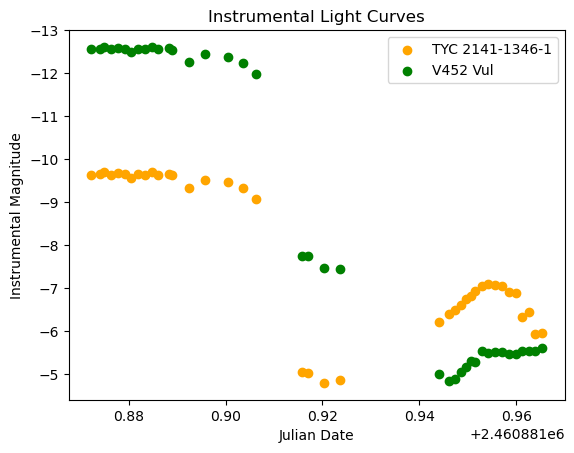

In [249]:
plt.scatter(timeseries['time'], timeseries['Comp'], color = 'orange', label = 'TYC 2141-1346-1')
plt.scatter(timeseries['time'], timeseries['Mag'], color = 'green', label = 'V452 Vul')
plt.ylabel('Instrumental Magnitude')
plt.xlabel('Julian Date')
plt.title('Instrumental Light Curves')
plt.gca().invert_yaxis()
plt.legend()
plt.savefig('Instrumental Light Curves.png')

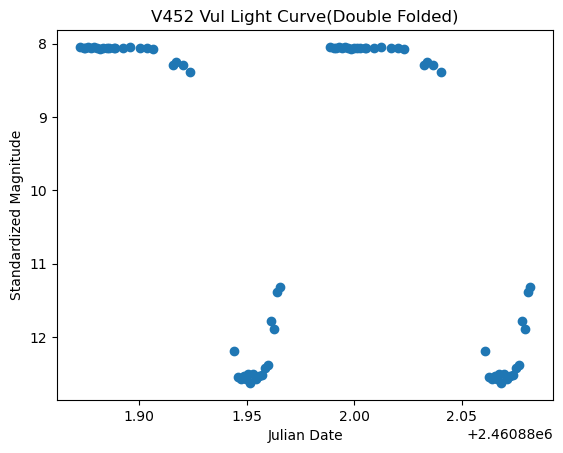

In [251]:
# plt.scatter(times, mags_target, color = 'blue')
# plt.scatter(timeseries['time'], timeseries['Comp'], color = 'orange')
# plt.scatter(timeseries['time'], timeseries['Mag'], color = 'green')
plt.scatter(x, y)
plt.ylabel('Standardized Magnitude')
plt.xlabel('Julian Date')
plt.title('V452 Vul Light Curve(Double Folded)')
plt.gca().invert_yaxis()
plt.savefig('V452 Vul Light Curve Double Folded.png')

In [172]:
def fit_function(my_x, my_a, my_c, my_w):

    return  my_a * np.exp( - (((my_x - my_c)**2) / my_w)) + 8

In [181]:
my_guess_a = 6.5
my_guess_c = 2460881.952
my_guess_w = 0.0002

init_guesses = [my_guess_a, my_guess_c, my_guess_w]

fitpars, error = curve_fit(fit_function,
                           x, y,
                           p0 = init_guesses,
                           maxfev=5000)
print(fitpars)

x_new =  np.arange(x[0], x[-1], 0.001).tolist()

[4.66262707e+00 2.46088195e+06 3.13549309e-04]


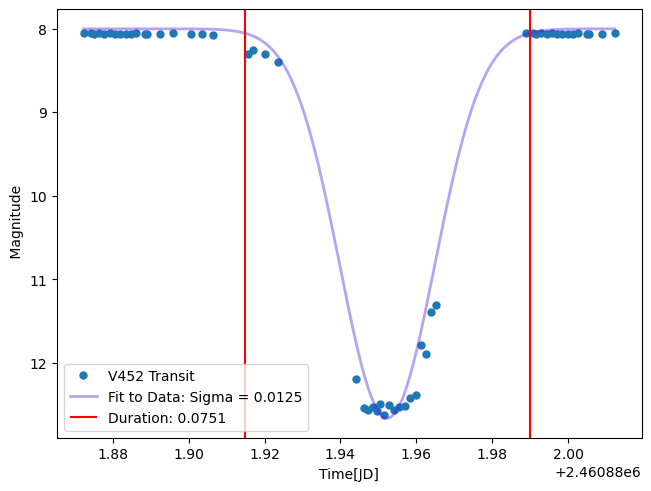

In [204]:
fig, ax = plt.subplots(
    constrained_layout = True
)

# ax.set_title("V452 Vul Transit Fit")

ax.set_xlabel(f'Time[JD]')
ax.set_ylabel(f' Magnitude')

sigma = np.sqrt(fitpars[2]/2)
ax.plot(x, y,
        marker = "o",
        linestyle = 'None',
        markersize = 5,
       label = 'V452 Transit')

# ax.plot(x, fit_function(x, *init_guesses),
#         color = (0.3, 0.9, 0.2, 0.8),
#         marker = "None",
#         linestyle = "--",
#         linewidth = 2,
#         label = "Initial Guess")

ax.plot(x_new, fit_function(x_new, *fitpars),
        color = (0.3, 0.1, 0.9, 0.4),
        marker = "None",
        linestyle = "-",
        linewidth = 2,
        label = f"Fit to Data: Sigma = {sigma:.4f}")
ax.invert_yaxis()

ax.vlines(fitpars[1] - 3*sigma, 0, 1, transform = ax.get_xaxis_transform(), color = 'r')
ax.vlines(fitpars[1] + 3*sigma, 0, 1, transform = ax.get_xaxis_transform(), label = f'Duration: {6*sigma:.4f}', color = 'r')

ax.legend(loc=0);

fig.savefig('V452 Transit Fit.png')

In [256]:
min_brightness = np.max(y)
max_brightness = np.min(y)
min_flux = 10**(min_brightness/(-2.5))
max_flux = 10**(max_brightness/(-2.5))
change = max_flux - min_flux
print(min_brightness - max_brightness)
# print(max_brightness)

4.57652513287565


In [ ]:
percent_change = 10**(change/2.5)
percent_change

67.70333359964722

In [258]:
r_planet = np.sqrt(percent_change/100) * 0.805
# r_planet
r_planet /0.10049

6.5914059655551185

In [14]:
N_sky = []
for i in range(0, len(radii)):
    N_sky.append(ap_phot[f'aperture_sum_{i}'][0])
len(N_sky)

29

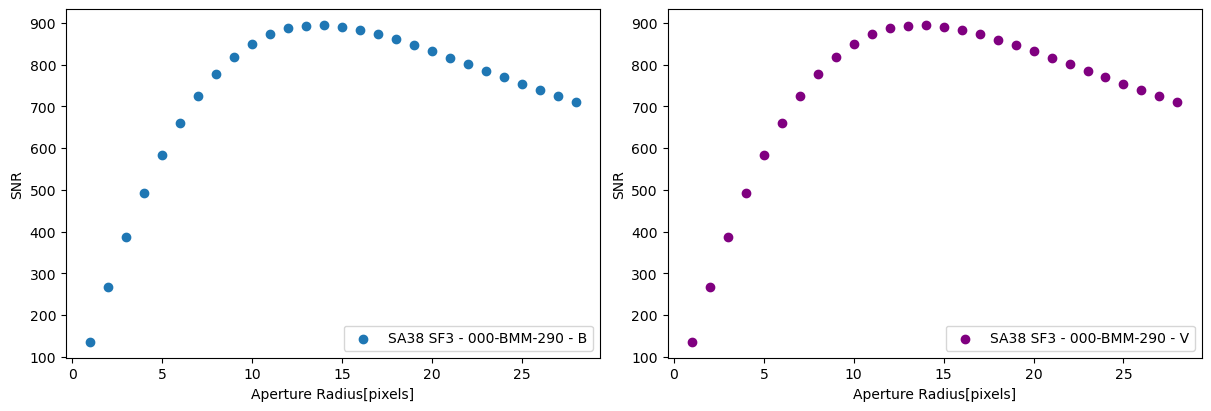

In [80]:
length = len(ap_phot[0])
radii = list(range(1,length-4))
N_sky1 = ap_phot['background'][2]

N_star1 = []
for i in range(0,len(radii)):
    N_star1.append(ap_phot[f'aperture_sum_{i}'][2])

SNR1 = []

for i in range(0, len(radii)):
    SNR1.append(((gain*N_star1[i])/np.sqrt((gain*N_star1[i] + areas[i][0]*gain*N_sky1 + areas[i][0]*(readout_noise**2)))))


N_sky2 = ap_phot1['background'][2]

N_star2 = []
for i in range(0,len(radii)):
    N_star2.append(ap_phot1[f'aperture_sum_{i}'][2])

SNR2 = []

for i in range(0, len(radii)):
    SNR2.append(((gain*N_star2[i])/np.sqrt((gain*N_star2[i] + areas1[i][0]*gain*N_sky2 + areas1[i][0]*(readout_noise**2)))))

fig, ax = plt.subplot_mosaic(
        '''
        BA
        ''',
        figsize = (12, 4), 
        constrained_layout = True
    )

ax['A'].scatter(radii, SNR1, label = 'SA38 SF3 - 000-BMM-290 - V', color = 'purple')
ax['A'].set_xlabel('Aperture Radius[pixels]')
ax['A'].set_ylabel('SNR')
ax['A'].legend(loc = 0)
ax['B'].scatter(radii, SNR2, label = 'SA38 SF3 - 000-BMM-290 - B')
ax['B'].set_xlabel('Aperture Radius[pixels]')
ax['B'].set_ylabel('SNR')
ax['B'].legend(loc = 0)

fig.savefig('Extinction SNR.png')


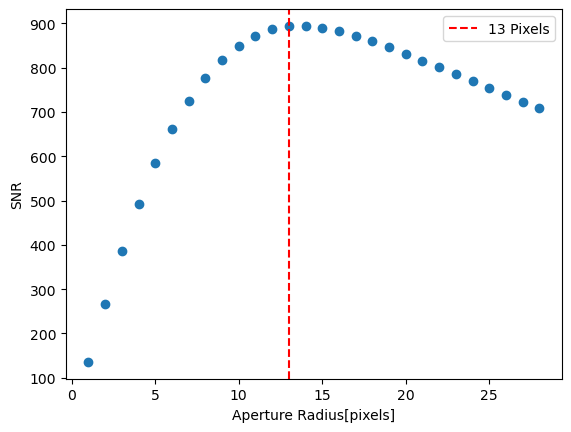

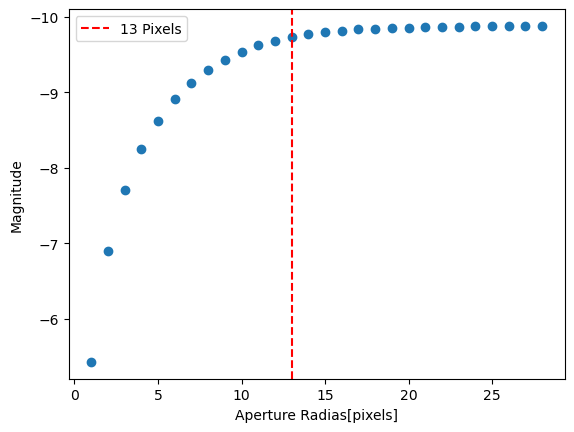

In [85]:
length = len(ap_phot[0])
radii = list(range(1,length-4))
N_sky = ap_phot['background'][2]

N_star = []
for i in range(0,len(radii)):
    N_star.append(ap_phot[f'aperture_sum_{i}'][2])

SNR = []

for i in range(0, len(radii)):
    SNR.append(((gain*N_star[i])/np.sqrt((gain*N_star[i] + areas[i][0]*gain*N_sky + areas[i][0]*(readout_noise**2)))))

mags = []
for i in range(0, len(radii)):
    mags.append(-2.5*np.log10(ap_phot[f'aperture_sum_{i}'][2]/t_exp))

fig1, ax1 = plt.subplots()

ax1.scatter(radii, SNR)
ax1.set_xlabel('Aperture Radius[pixels]')
ax1.set_ylabel('SNR')
ax1.axvline(13, 0, 1, linestyle  ='--', color = 'red', label = '13 Pixels')
ax1.legend(loc = 0)
fig1.savefig('000-BMM-290 SNR.png')

fig2, ax2 = plt.subplots()

ax2.scatter(radii, mags)
ax2.invert_yaxis()
ax2.set_xlabel('Aperture Radias[pixels]')
ax2.axvline(13, 0,1, linestyle  ='--', color = 'red', label = '13 Pixels')
ax2.set_ylabel('Magnitude')
ax2.legend(loc = 0)
fig2.savefig('000-BMM-290 Radial Magnitude.png')



In [18]:
standard_bmags = (-2.5*np.log10(ap_phot1['aperture_sum_0']/t_exp)).tolist()
standard_bmags

[-10.916913314961006, -9.47792668795098, -9.294997548192402]

In [19]:
standard_vmags = (-2.5*np.log10(ap_phot['aperture_sum_0']/t_exp)).tolist()
standard_vmags

[-11.928146648141665, -10.062075699277678, -9.736165802290156]

In [20]:
app_mags = Table()
app_mags['Star'] = ['000-BMM-293', '000-BMM-290', '000-BMM-292']
app_mags['vmag'] = standard_vmags
app_mags['bmag'] = standard_bmags
app_mags['V'] = [8.575, 10.451, 10.774]
app_mags['B'] = [9.841, 11.418, 11.131]



In [2]:
app_mags = ascii.read('Apparant Magnitudes.csv')
app_mags

Star,vmag,bmag,V,B
str11,float64,float64,float64,float64
000-BMM-293,-11.928146648141665,-10.916913314961006,8.575,9.841
000-BMM-290,-10.062075699277678,-9.47792668795098,10.451,11.418
000-BMM-292,-9.736165802290156,-9.294997548192402,10.774,11.131


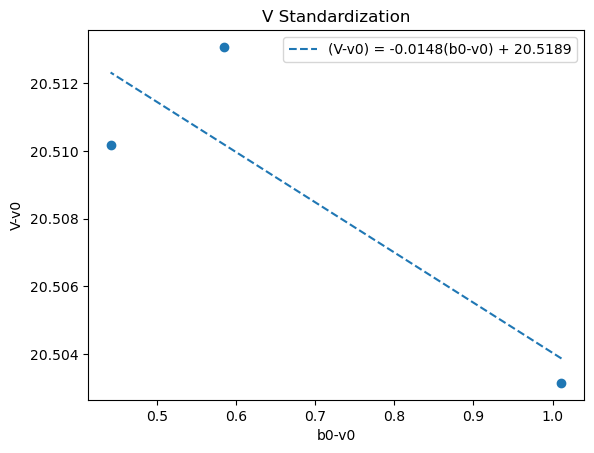

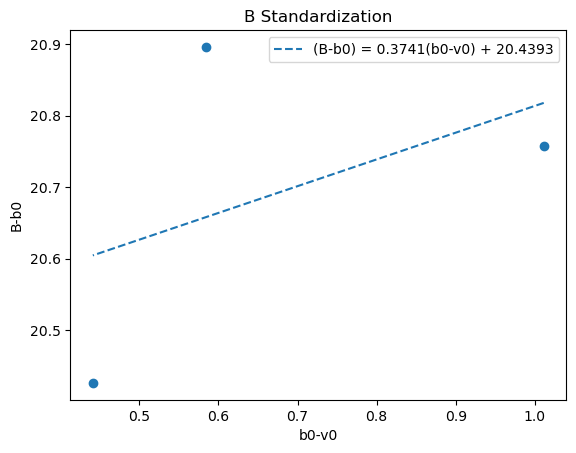

In [ ]:
mv, mb = standardize_star(app_mags['V'], app_mags['B'], app_mags['vmag'], app_mags['bmag'])